In [1]:
from keras.models import load_model
from DenseDepth.layers import BilinearUpSampling2D
from tensorflow.keras.layers import Layer, InputSpec
from DenseDepth.utils import predict, load_images, display_images
from matplotlib import pyplot as plt
import glob
import cv2
import numpy as np

model = None

C:\Users\Vayden\anaconda3\envs\depth\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def predict_images(model, images):
    if model is None:
        model_path = "../DenseDepth/nyu.h5"
        custom_objects = {'BilinearUpSampling2D': BilinearUpSampling2D, 'depth_loss_function': None}
        model = load_model(model_path, custom_objects=custom_objects, compile=False)
    inputs = []
    for id, image in enumerate(images):
        print(id, image.shape)
        inputs.append(cv2.resize(image, (640, 480)))
    inputs = np.array(inputs)
    outputs = predict(model, inputs)
    print("outpus")
    monocular_depth_maps = [cv2.resize(outputs[i].astype(np.float32), (images[i].shape[1], images[i].shape[0])) for i in range(len(images))]

    monocular_depth_maps = [np.stack([monocular_depth_map, monocular_depth_map, monocular_depth_map], axis=2) for monocular_depth_map in monocular_depth_maps]
    return monocular_depth_maps

In [3]:
files = glob.glob("./*")
files.remove(files[3])
print(files)
images = [cv2.imread(file) for file in files]
print(len(images))
depth_maps = predict_images(model, images)

['.\\hornsRevClouds.jpg', '.\\offshore1.jpg', '.\\onshore_windpark.jpg', '.\\Tino_wind_park_with_visualized_depth_estimation.png']
4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
0 (525, 700, 3)
1 (443, 600, 3)
2 (578, 800, 3)
3 (2048, 2048, 3)
outpus


In [20]:
from AHandler import utils


def visualize(depth_maps):
    vis = []
    for depth_map in depth_maps:
        tmp = utils.rescale_depth_images(depth_map)
        zeros = np.zeros_like(depth_map)
        color = 2
        zeros[:, :, color] = tmp[:, :, color]
        vis.append(tmp)
    return utils.visualize_image(utils.concat_images(vis, mode=utils.ConcatMode.HORIZONTAL))


visualize([depth_maps[3]])

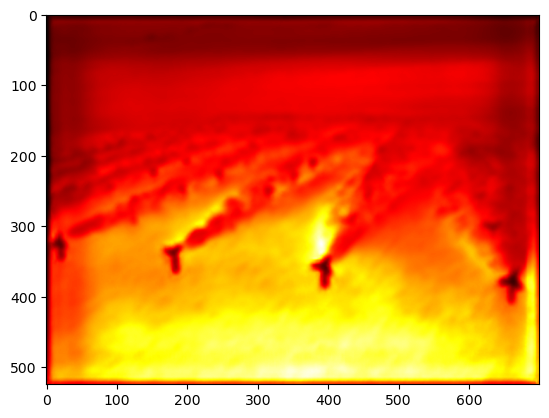

In [30]:
tmp = utils.rescale_depth_images(depth_maps[0])
zeros = np.zeros_like(tmp)
plt.imshow(tmp[:,:,0], cmap='hot')


In [28]:
plt.imshow(utils.rescale_depth_images(depth_maps[3]) / 255, cmap='hot')

TypeError: list indices must be integers or slices, not tuple

In [ ]:
print(files)
print(cv2.imread(files[-1]))